## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [2]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [3]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,01:45,2020-01-01T01:45:00+01:00,5612.0,1093.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,28.33,48.65,1.98,37.88,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:00,2020-01-01T02:00:00+01:00,5655.0,1055.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,27.41,47.43,2.00,38.57,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,02:15,2020-01-01T02:15:00+01:00,5805.0,1084.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,24.96,44.34,1.93,38.23,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,03:00,2020-01-01T03:00:00+01:00,5420.0,341.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,20.83,34.55,2.10,38.91,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-01-01,03:30,2020-01-01T03:30:00+01:00,5324.0,236.0,NaN,1.0,...,NaN,0.02,2.08,0.0,0.0,20.55,33.48,2.16,39.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-17,16:45,2020-02-17T16:45:00+01:00,5063.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4604,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-17,18:15,2020-02-17T18:15:00+01:00,5573.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4605,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-17,18:30,2020-02-17T18:30:00+01:00,5728.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4606,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-17,19:30,2020-02-17T19:30:00+01:00,5929.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True)
data.dtypes

Code INSEE région                    int64
Région                              object
Nature                              object
Date                        datetime64[ns]
Heure                               object
Date - Heure           datetime64[ns, UTC]
Consommation (MW)                  float64
Thermique (MW)                     float64
Nucléaire (MW)                     float64
Eolien (MW)                        float64
Solaire (MW)                       float64
Hydraulique (MW)                   float64
Pompage (MW)                       float64
Bioénergies (MW)                   float64
Ech. physiques (MW)                float64
TCO Thermique (%)                  float64
TCH Thermique (%)                  float64
TCO Nucléaire (%)                  float64
TCH Nucléaire (%)                  float64
TCO Eolien (%)                     float64
TCH Eolien (%)                     float64
TCO Solaire (%)                    float64
TCH Solaire (%)                    float64
TCO Hydraul

In [5]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [6]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [7]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2020-01-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2020-01-01 00:45:00+00:00             5612.0          1093.0   
 1    2020-01-01 01:00:00+00:00             5655.0          1055.0   
 2    2020-01-01 01:15:00+00:00             5805.0          1084.0   
 3    2020-01-01 02:00:00+00:00             5420.0           341.0   
 4    2020-01-01 02:30:00+00:00             5324.0           236.0   
 ...                        ...                ...             ...   
 3692 2020-01-01 15:30:00+00:00             4944.0           838.0   
 3693 2020-01-01 16:30:00+00:00             5385.0          1206.0   
 3694 2020-01-01 18:00:00+00:00             5796.0          1781.0   
 3695 2020-01-01 20:15:00+00:00             5647.0          2001.0   
 3696 2020-01-01 22:00:00+00:00             5823.0          1684.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN          1.0           0.0            1590.0   
 1  

In [8]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

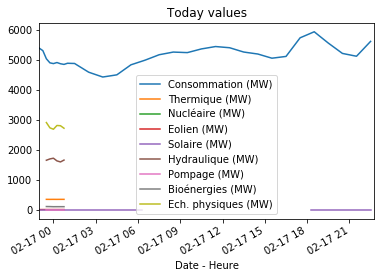

In [9]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")
# TODO: replace with : data.loc[data['Date - Heure'] == today].plot(x='Date - Heure', title="Today values")

In [10]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [11]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

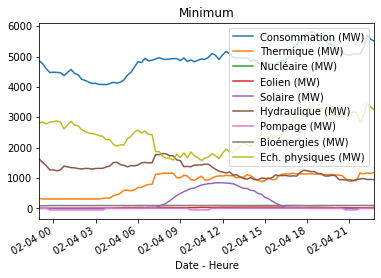

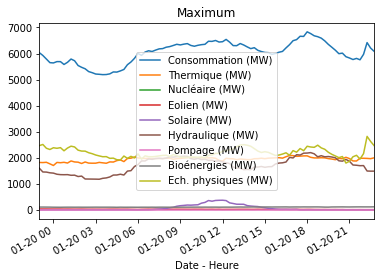

In [12]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [13]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5428.457565
Thermique (MW)         1186.209663
Nucléaire (MW)                 NaN
Eolien (MW)              10.986726
Solaire (MW)            124.863377
Hydraulique (MW)       1532.778812
Pompage (MW)             -8.274158
Bioénergies (MW)        108.491800
Ech. physiques (MW)    2469.556959
TCO Thermique (%)        21.561285
TCH Thermique (%)        36.171631
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.204412
TCH Eolien (%)           22.888874
TCO Solaire (%)           2.300561
TCH Solaire (%)           9.549921
TCO Hydraulique (%)      28.175140
TCH Hydraulique (%)      46.905454
TCO Bioénergies (%)       2.008836
TCH Bioénergies (%)      37.028351
Column 26                      NaN
dtype: float64

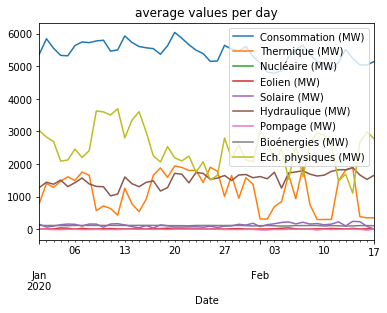

In [14]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

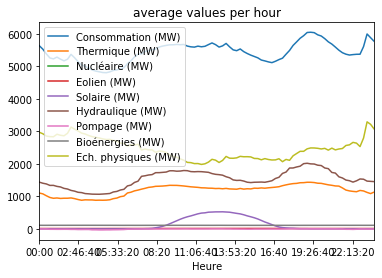

In [15]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

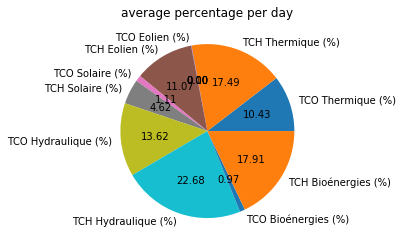

In [16]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')